In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [9]:
data.reset_index(inplace=True)

In [10]:
data

Price,level_0,index,Date,Close,High,Low,Open,Volume
Ticker,,,,GOOG,GOOG,GOOG,GOOG,GOOG
0,0,0,2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
1,1,1,2012-01-04,16.566145,16.614980,16.376260,16.485581,114989399
2,2,2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,3,3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,4,4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...,...,...
2756,2756,2756,2022-12-14,94.860703,96.761702,93.497166,95.089622,26452900
2757,2757,2757,2022-12-15,90.770065,93.586726,90.003699,93.099038,28298800
2758,2758,2758,2022-12-16,90.431679,91.317483,89.585687,90.770072,48485500


In [13]:
ma_100_days = data.Close.rolling(100).mean()

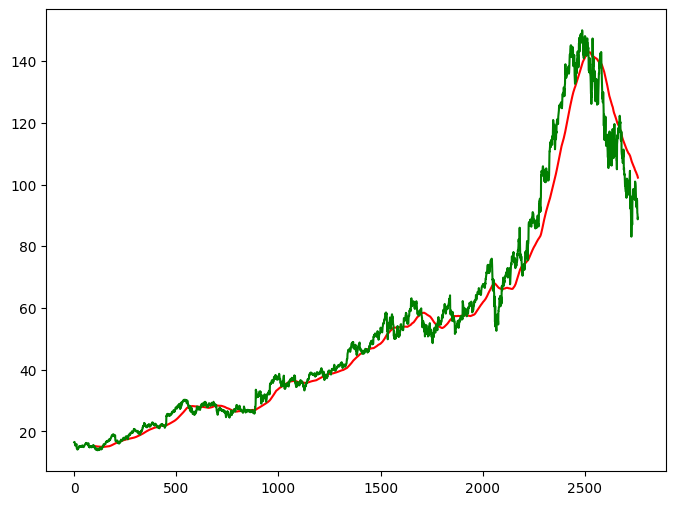

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [17]:
ma_200_days = data.Close.rolling(200).mean()

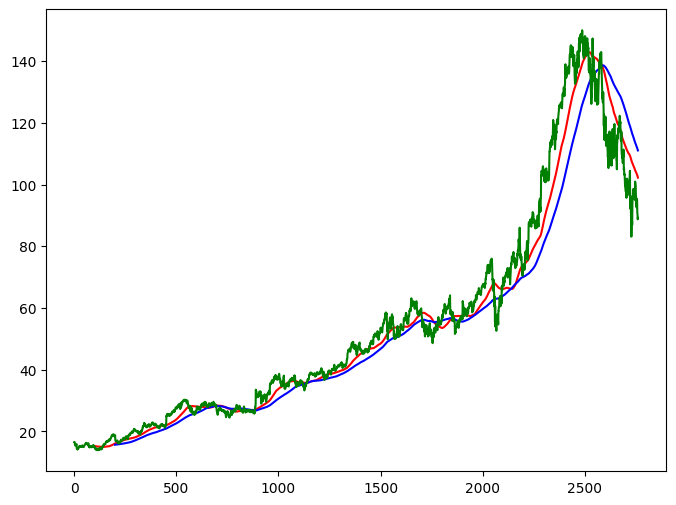

In [20]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [21]:
data.dropna(inplace=True)

In [31]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test =pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [32]:
data_train.shape[0]

2208

In [33]:
data_test.shape[0]

553

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data_train_scale = scaler.fit_transform(data_train)

In [36]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100-i])
  y.append(data_train_scale[i,0])

In [37]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [39]:
x, y = np.array(x), np.array(y)

In [41]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [45]:
model.fit(x,y, epochs=50 ,batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0573
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0550
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0552
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0560
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0570
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0532
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0563
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0532
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0555
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0546
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0556
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0561
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0535
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0554
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0539
Epoch 16/50
66/6

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 60)          │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 60)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 80)          │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 80)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [56]:
pas_100_days = data_train.tail(100)

In [57]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [58]:
data_test_scale  =  scaler.fit_transform(data_test)

In [59]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [60]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


In [61]:
scale =1/scaler.scale_

In [62]:
y_predict = y_predict*scale

In [63]:
y = y*scale

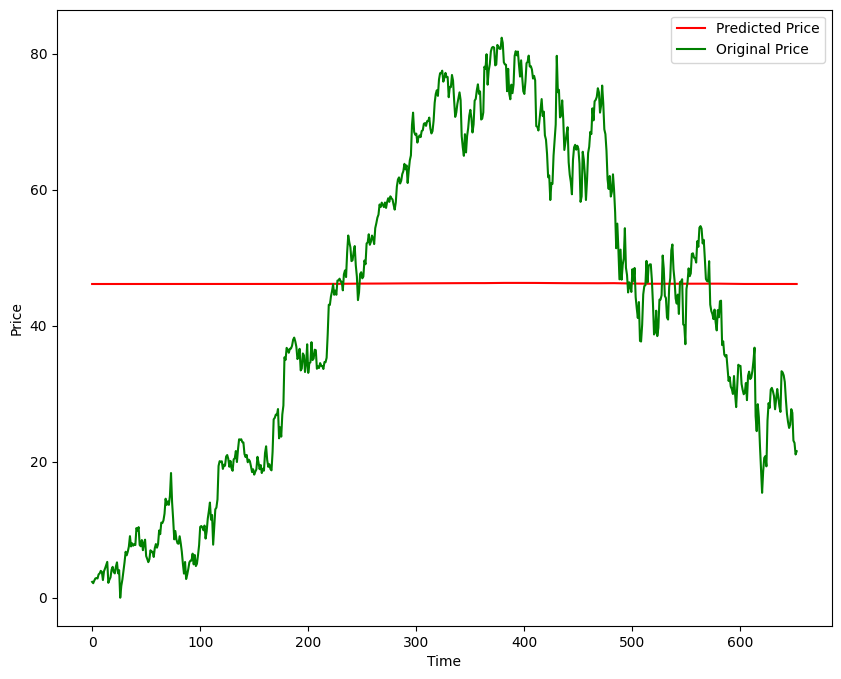

In [64]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
model.save('Stock Predictions Model.keras')